<a href="https://colab.research.google.com/github/thwjd639/Data_Analysis/blob/main/220317%20%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EB%94%B0%EB%A6%89%EC%9D%B4%20%EC%9E%90%EC%A0%84%EA%B1%B0%20%EC%9D%B4%EC%9A%A9%20%EC%98%88%EC%B8%A1%20AI%EB%AA%A8%EB%8D%B8%20%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dacon [공공]서울시따릉이 자전거 이용예측 AI모델 대회를 필사합니다. [(link)](https://dacon.io/competitions/open/235576/codeshare)

기간 : 2022.03.17 ~ 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Library & Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab/Kaggle&Dacon_필사/data/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab/Kaggle&Dacon_필사/data/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab/Kaggle&Dacon_필사/data/따릉이/submission.csv')

# 2. Exploratory Data Analysis (EDA)

- info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [6]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      715 non-null    int64  
 1   count   0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 11.3 KB


- head & tail

In [7]:
train.head(2)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0


In [8]:
train.tail(2)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


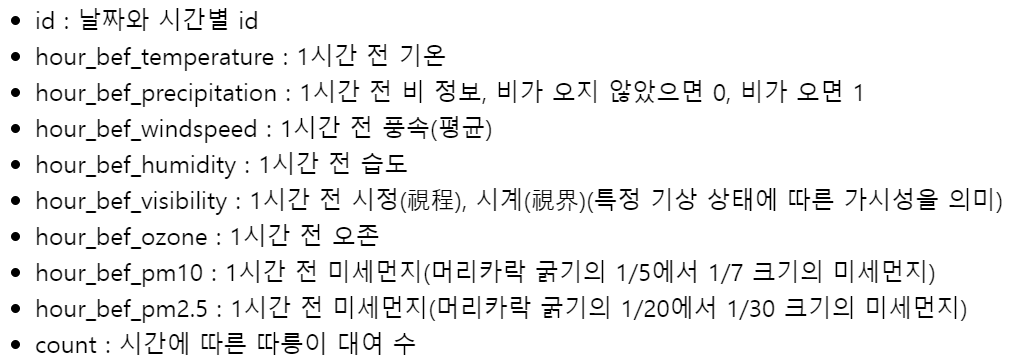

In [9]:
test.head(2)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0


In [10]:
test.tail(2)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0
714,2177,8,22.3,0.0,1.0,63.0,1277.0,0.007,30.0,24.0


In [11]:
submission.head(2)

,id,count
0,0,NaN
1,1,NaN


- shape

In [12]:
train.shape

(1459, 11)

In [13]:
test.shape

(715, 10)

예측하고자 하는 count 항목이 비어 있는 상태로 train보다 test가 columns 수가 1개 적다

In [14]:
submission.shape

(715, 2)

⛔ 함수에서 ()를 사용하는 유무의 차이는 무엇일까?

- describe 기술통계량
연속형 데이터를 **의미 있는 수치**로 요약하여 데이터의 전반적인 특성을 파악

In [15]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [16]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


- group by 집단별

In [17]:
train[['hour', 'count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [18]:
train['hour'].head()

0    20
1    13
2     6
3    23
4    18
Name: hour, dtype: int64

In [19]:
# 보고자하는 컬럼만 추출하여 보기
train[['hour', 'count']].head()

,hour,count
0,20,49.0
1,13,159.0
2,6,26.0
3,23,57.0
4,18,431.0


- plot

|색|약자|마커|의미|선|의미|
|---|---|---|---|---|---|
|blue|b|.|점|-|실선|
|green|g|o|원|--|끊어진 실선|
|red|r|v|역삼각형|-.|점+실선|
|cayn|c|^|삼각형|:|점선|
|magenta|m|s|사각형|
|yellow|y|*|별|
|black|k|x|엑스|
|white|w|d|다이아몬드|

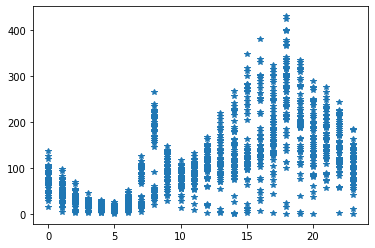

In [20]:
# 시간대(hour)별 따릉이 대여수(count) 산점도
plt.plot('hour', 'count', '*', data = train)

In [21]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

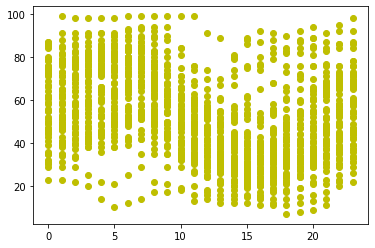

In [22]:
# 시간대별 습도 산점도
plt.plot('hour', 'hour_bef_humidity', 'yo', data = train)

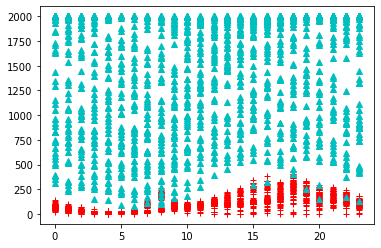

In [23]:
# 시간대별 따릉이 이용수 및 1시간전 시정/시계 산점도
plt.plot('hour', 'count', 'r+', data=train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data=train)

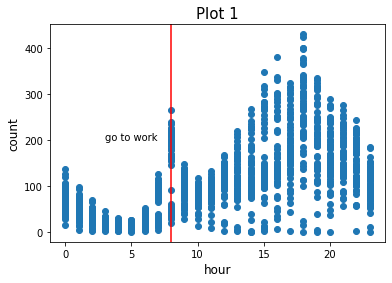

In [24]:
# 따릉이 이용건 수 중에서 출근 시간 이용량 확인
plt.title('Plot 1', fontsize = 15)  # 그래프 제목 설정
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize=12)     # x축 읾 설정
plt.ylabel('count', fontsize = 12)  # y축 이름 설정
plt.axvline(8, color = 'red')       # 축을 가로지르는 세로 선 생성
plt.text(3, 200, 'go to work', fontsize =10)    # 원하는 위치에 텍스트 생성
plt.savefig('plt1.png')

- 상관계수

In [25]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


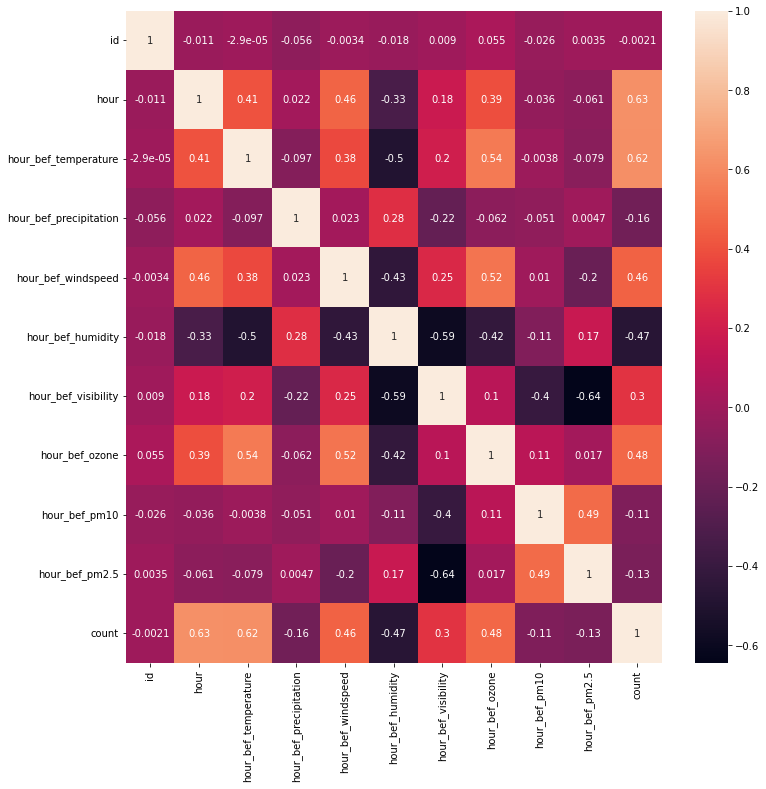

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot=True)

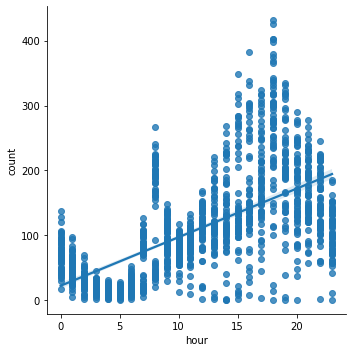

In [27]:
sns.lmplot(x='hour', y='count', data=train)

Scatter plot with regression line([link](https://kimdingko-world.tistory.com/170))
- `lmplot()`
   - 주어진 데이터로 산점도럴 FacetGrid에 생성
      + FacetGrid 클래스 : 여러 플롯에 대한 그리드를 생성하여 데이터의 다른 하위 집합과 데이터 분포 간의 관계를 시각화하는 데 사용됩니다. 
   - parameter(매개변수) `hue` 와 `col` parameters를 사용하여 그래프를 그림
      - hue : 새로운 변수를 다른 색상을 이용하여 추가하는 파라미터 
      - col : 별도의 새로운 plot으로 분할하는 데 사용되는 파라미터

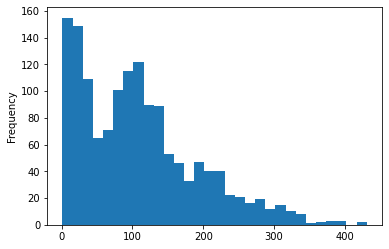

In [28]:
train['count'].plot(kind = 'hist', bins=30)

- `bin` : 가로축 구간의 갯수

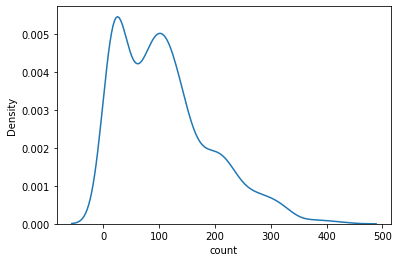

In [29]:
sns.kdeplot(train['count'])

- 커널 밀도(density) 추정을 사용하여 일변량 또는 이변량 분포를 플로팅

⛔ 일변량 또는 이변량 분포란?

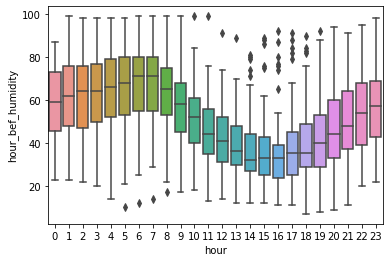

In [30]:
sns.boxplot(x='hour', y = 'hour_bef_humidity', data = train)

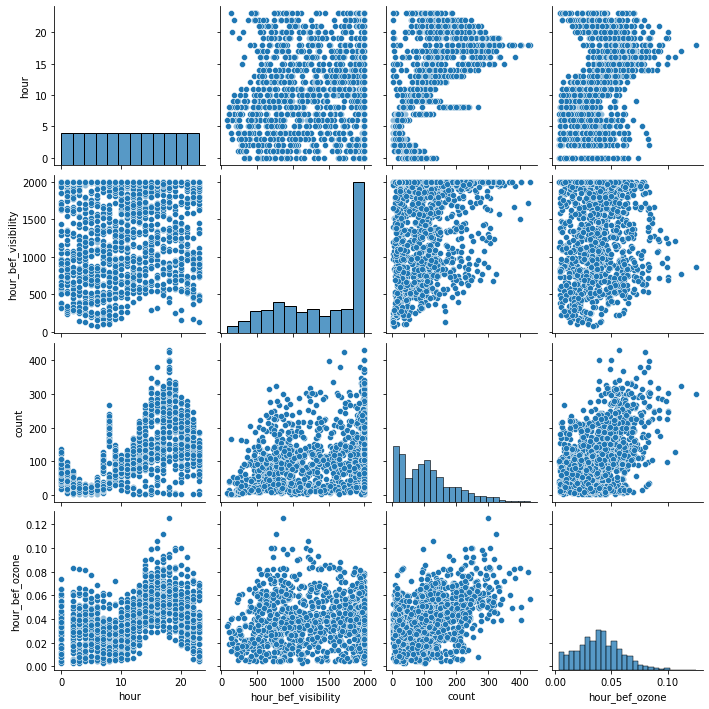

In [31]:
sns.pairplot(train[['hour', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

- `sns.pairplot()` :  데이터 세트에서 쌍별 관계를 플로팅

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


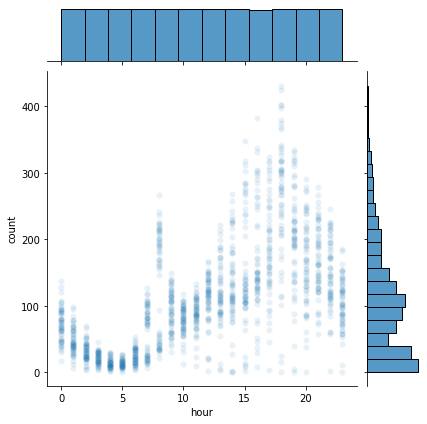

In [32]:
sns.jointplot('hour','count', data=train, alpha=0.1)

- 이변량 및 일변량 그래프를 사용하여 두 변수의 플롯 생성

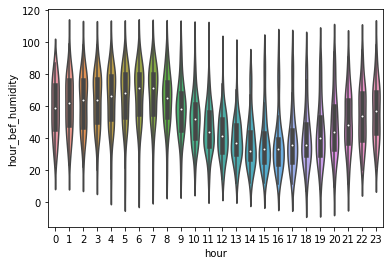

In [33]:
sns.violinplot(x = 'hour', y='hour_bef_humidity', data=train)

시간대별 습도 분포를 그려주었다. 새벽 4-6시 쯤 습도 범위가 가장 넓다는 것을 보였다.

- `sns.violineplot` : 상자 그림과 커널 밀도 추정값의 조합을 그립니다.

In [34]:
train[train['hour']>12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


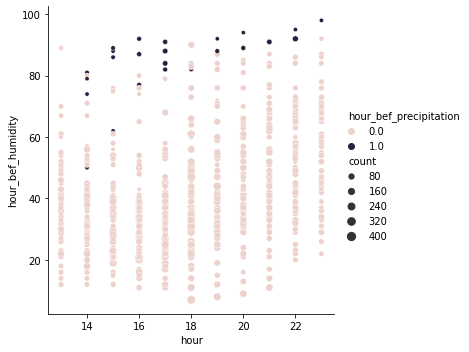

In [35]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size='count', data = train[train['hour'] > 12])

12시 이후의 습도 대비 '비가 왔는지'를 확인하고 따릉이 사용 빈도를 그룹화하여 산전도로 보여주었다.

- `sns.relplot()` : FacetGrid에 관계형 플롯을 그리기 위한 Figure-level interface
   * `hue` : 그룹화 변수 ⇨ 다른 범주일 경우 생상 매핑이 다르게 작동
   * `size` : 크기가 다른 요소들을 그룹화 변수
- FacetGrid클래스 란?
   * 여러 플롯에 대한 그리드를 생성하여 데이

# 3. 데이터 전처리(Data Cleansing & Pre-Processing)

In [36]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

-  `isna()` : 결측치 여부 확인, 결측치면 True, 아니면 False

In [37]:
# 결측치 대신 채우고자하는 컬럼과 값(여기서는 평균값을 사용)을 명시
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [38]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [39]:
train_isna_sum = train.isna().sum()

In [40]:
# 결측치를 갖는 index 추출
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [41]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [42]:
# 결측값에 평균값을 넣는 함수를 정의
def fill_bicycle_na(df, column) :
    df[column] = df[column].fillna(value = df[column].mean())

In [43]:
fill_bicycle_na(train, 'hour_bef_precipitation')

In [44]:
# 반복문을 사용하여 fill_bicycle_na를 처리
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [45]:
test_isna_sum = test.isna().sum()

In [46]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [47]:
# test에 결측치가 있는 columns 출력
for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [48]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [49]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

# 4. 변수 선택 및 모델 구축(Feature Engineering & Initial Modeling)

|KNN|RandomForest|
|-----|-----|
|![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)|![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)|

- KNN 모형

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [51]:
model = KNeighborsRegressor(n_jobs = -1)

- `sklearn.neighbors.KNeighborsRegressor` : k-최근접 이웃을 기반으로 한 회귀
   * `n_jobs` : 병렬로 사용될 프로세스 또는 스레드 수 지정, 1 = 병렬 처리 X, -1 = CPU 사용, None = 미설정
   * `n_neighbors` : 이웃의 수(k)

목표는 훈련 세트에서 가장 가까운 이웃과 관련된 목표의 로컬 보간으로 예측됩니다.

In [52]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [53]:
X_train.shape, y_train.shape, X_test.shape

((1459, 2), (1459,), (715, 2))

In [54]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [55]:
kfold = KFold(n_splits= 5, shuffle = True, random_state = 10)

- `sklearn.model_selection.KFold` : K-Folds 교차 검증기
   * n_splits : fold의 수, default = 5, 최소 2 이상
   * shuffle : 분할전 데이터 섞을지 여부
   * random_state : 각 fold의 무작위성을 제어하는 ​​인덱스의 순서에 영향

학습/테스트 세트의 데이터를 분할하기 위한 학습/테스트 인덱스를 제공합니다. 데이터 세트를 k 연속 fold로 분할합니다(기본적으로 섞지 않음).

그런 다음 각 폴드는 유효성 검사로 한 번 사용되는 반면 k - 1개의 나머지 폴드는 훈련 세트를 형성합니다.

In [56]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring= 'neg_mean_squared_error'))

-2155.0580267382193

- `sklearn.model_selection.cross_val_score` : 교차 검증으로 평가
   * estimator : 추정량, 훈련하고자 하는 모델
   * X : 학습시킬(feature to fit) data
   * y : 예측하려는 target 변수
   * cv : cross-validation 전략/fold의 수
      + kfold : 계측별 k-fold 교차 검증(클래스 비율이 데이터셋의 클래스 비율과 같도록 데이터를 나눔)
      + None : (default) 5-fold cross validation
   * scoring : 예측성능 평가지표([link](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules))
      + neg_mean_squared_error : 평균 제곱 오차 회귀 손실. return되는 값이 낮을 수록 좋다.

In [57]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2047.60961877478

In [58]:
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1981.9941981468987

model_5, model_7, model_9 중에서는 loss/error 값이 model_9가 가장 낮은 것을 볼 수 있으므로 model을 fit/학습 하겠다.

In [59]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [60]:
submission['count'] = model_9.predict(X_test)

학습된 모델을 test 데이터에 적용하여 count를 예측하였다.

In [61]:
submission.to_csv('knn_9.csv', index = False)

따릉이 예측 대여건을 csv 파일로 저장한다

In [62]:
model.fit(X_train, y_train)
submission['count'] = model.predict(X_test)
submission.to_csv('knn_5.csv', index = False)

⛔ 무엇을 보려고 이것을 하는 걸까??

- RandomForest

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [64]:
X_rf_train = train.drop(['id', 'count'], axis=1)
y_rf_train = train['count']
X_rf_test = test.drop('id', axis=1)

knn과 다르게 변수선택(feature engineerimg)을 다르게 하였다

In [65]:
X_rf_train.shape, y_rf_train.shape, X_rf_test.shape

((1459, 9), (1459,), (715, 9))

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
RandomForestRegressor()

RandomForestRegressor()

⛔ parameter가 지금 비어 있다는 것을 보여주는 것일까?

In [68]:
param = {'min_samples_split' : [30, 50, 70],
         'max_depth' : [5, 6, 7],
         'n_estimators' : [50, 150, 250]}

In [69]:
param

{'max_depth': [5, 6, 7],
 'min_samples_split': [30, 50, 70],
 'n_estimators': [50, 150, 250]}

RandomForestRegressor에 사용되는 parameter들을 설정하였다.
- n_estimators : 숲(forest)에 있는 나무(tree)의 수
- max_depth ; tree의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수(defualt = 2)
- n_jobs : 병렬로 실행할 작업 수( -1 : 모든 프로세서를 사용한다는 의미)

In [70]:
gs = GridSearchCV(estimator = model, param_grid = param, scoring = 'neg_mean_squared_error', cv = 3)

`sklearn.model_selection.GridSearchCV`
- `estimator` : classifier, regressor, pipeline 등 가능
- `param_grid` : 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다.
- `scoring` : 예측 성능을 측정할 평가 방법, ex) accuracy 등
- `cv` : 교차 검증에서 몇개로 분할되는지 지정한다

분류/회귀 알고리즘에서 사용되는 복수의 하이퍼 파라미터를 grid search를 사용하여 학습하고 scoring 기준으로 성능을 측정하여 최적의 하이퍼 파라미터를 알려준다. 

> 시도해 볼 하이퍼파라미터들을 지정하면, **모든** 조합에 대해 교차검증 후 가장 좋은 성능을 내는 하이퍼파라미터 조합을 찾음.
> - 단점 : 하이퍼파라미터 값들이 많아지면 시간이 오래 걸림
[출처](https://blog.naver.com/PostView.naver?blogId=dalgoon02121&logNo=222103377185&redirect=Dlog&widgetTypeCall=true&directAccess=false)

In [71]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [72]:
gs.fit(X_rf_train, y_rf_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

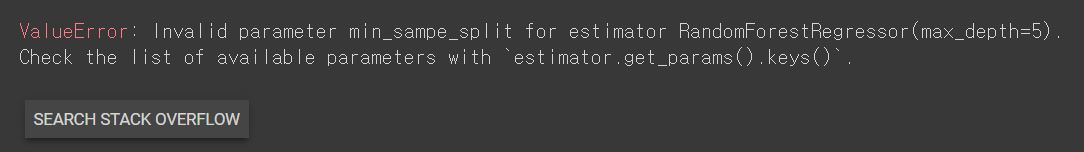



'SEARCH STACK OVERFLOW'에서 검색되지 않는 에러가 나와서 2-3일 걸쳐서 원인을 찾았다. 우선 에러는 
> 'ValueError: 추정기 RandomForestRegressor(max_depth=5)에 대한 잘못된 매개변수 min_sample_split입니다. `estimator.get_params().keys()`로 사용 가능한 매개변수 목록을 확인하세요.'

라는 뜻이 었다. 파라미터의 설정이 무언가 잘 못된 것인가 `GridSearchCV`와 `RandomForestRegressor()`의 문서도 다시보면서 parameter를 정리하는 데 도움이 되었지만 결국 해결하지 못하여 답답하였는데.

검색하다가 [GridSearchCV의 Check the list of available parameters with `estimator.get_params().keys()` 에러 발생시 해결법](https://rudolf-2434.tistory.com/15)을 찾아서 해결방법을 찾았다. 그러나 결국 원인이 무엇인지 알아내지 못했던 와중에 에러에서 `min_sampe_split`이라는 parameter가 자동 생성되는 것이라면 sampe가 아니라 sample이 맞을 텐데 라는 생각으로 RandomForestRegressor()의 문서에서 parameter를 다시 찾아보니 `min_samples_split`로 명시가 되어 parameter를 정정하여 학습해보니.. 잘 돌아 갔다.  에러 해결ㅎㅎ 역시 다시 보자 오타 ㅠㅠㅠ 


In [73]:
submission['count'] = gs.predict(X_rf_test)

In [74]:
submission.to_csv('gridsearch.csv', index = False)

복수의 parameter와 내부 모형을 실행한 GridSearchCV 실행 결과는 `grid_scores_`에 저장된다.
- `grid_scores_` : grid search 실행 결과
- `best_score_` : 최고 점수
- `best_params_` : 최고 점수를 낸 최적 파라미터
- `best_estimator_` : 최고 점수를 낸 파라미터를 가진 모형
- `cv_results_` : fit 시킨 결과

In [75]:
# GridSearchCV 최적 파라미터 확인
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 150}

In [76]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.139675,0.009151,0.007382,0.000124,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2109.951692,-1776.308137,-1769.150193,-1885.136674,158.995080,10
1,0.409197,0.010768,0.018670,0.002390,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2089.099966,-1777.246587,-1771.657287,-1879.334613,148.344054,8
2,0.675625,0.006546,0.028944,0.002014,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2101.509373,-1790.464622,-1773.074440,-1888.349478,150.893914,12
3,0.134456,0.005115,0.007514,0.000367,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2162.414621,-1821.486490,-1737.507521,-1907.136211,183.736073,15
4,0.385128,0.004082,0.016953,0.000367,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2156.283001,-1848.267569,-1842.776178,-1949.108916,146.511353,18
5,0.648692,0.010981,0.027432,0.000924,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2156.842219,-1831.735394,-1806.275727,-1931.617780,159.596543,16
6,0.133443,0.006044,0.010660,0.004675,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2280.297988,-1937.416978,-1849.715059,-2022.476675,185.789807,27
7,0.377089,0.006212,0.016950,0.000283,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2240.200616,-1922.027769,-1870.009541,-2010.745975,163.632817,25
8,0.624185,0.012733,0.026875,0.001190,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2283.544889,-1913.763442,-1856.961175,-2018.089836,189.132076,26
9,0.148001,0.006124,0.007572,0.000088,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-1989.888879,-1694.809433,-1763.300768,-1815.999694,126.097456,6


In [77]:
pd.DataFrame(gs.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

각 컬럼명의 의미
- params : 적용된 개별 하이퍼 파라미터의 값
- mean_test_score : 세트에 대해 수행된 성능들의 평균값
- rank_test_score : mean_test_score을 바탕으로 평가 순위
- split_test_score : 각 세트별 정확도

In [78]:
print('GridSearchCV 최고 정확도:{0:.4f}'.format(gs.best_score_))

GridSearchCV 최고 정확도:-1785.9334


In [79]:
from sklearn.model_selection import RandomizedSearchCV

Hyper parameter에 대한 무작위 검색 방법.

GridSearchCV와 달리 모든 매개변수 값이 시도되는 것은 아니지만 고정된 수의 매개변수 설정이 지정된 분포에서 샘플링됨
- n_iter : 시도되는 매개변수 설정의 수

> GridSearch 와 동일한 방식으로 사용하지만 모든 조합을 다 시도하지는 않고, 각 반복마다 **임의의 값만** 대입해 지정한 횟수만큼 평가함.
[출처](https://blog.naver.com/PostView.naver?blogId=dalgoon02121&logNo=222103377185&redirect=Dlog&widgetTypeCall=true&directAccess=false)

In [80]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [81]:
model = RandomForestRegressor()

In [82]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [83]:
rs.fit(X_rf_train, y_rf_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [84]:
rs.best_params_

{'max_depth': 7, 'min_samples_split': 34, 'n_estimators': 171}

In [85]:
submission['count'] = rs.predict(X_rf_test)

In [86]:
submission.to_csv('randomsearch.csv', index = False)

In [87]:
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.870767,0.017595,0.030418,0.000960,171,34,7,"{'n_estimators': 171, 'min_samples_split': 34,...",-1653.212972,-1942.826859,-1559.569745,-1822.265225,-1469.036679,-1689.382296,172.397058,1
16,0.706891,0.006275,0.027058,0.001396,139,35,7,"{'n_estimators': 139, 'min_samples_split': 35,...",-1672.682096,-1932.216809,-1592.225502,-1842.665793,-1497.366214,-1707.431283,159.639667,2
29,0.396636,0.019930,0.014729,0.002731,80,42,7,"{'n_estimators': 80, 'min_samples_split': 42, ...",-1706.857617,-1997.836492,-1590.221137,-1870.708626,-1473.766345,-1727.878043,188.277549,3
17,1.140552,0.013007,0.043125,0.005957,233,44,7,"{'n_estimators': 233, 'min_samples_split': 44,...",-1701.003768,-1979.779840,-1627.724306,-1863.878700,-1528.704377,-1740.218198,162.242068,4
19,0.289704,0.008612,0.012378,0.000669,56,43,7,"{'n_estimators': 56, 'min_samples_split': 43, ...",-1739.590466,-1984.737519,-1611.875756,-1863.346939,-1529.359419,-1745.782020,164.759950,5
6,0.365393,0.003360,0.018779,0.006946,75,36,6,"{'n_estimators': 75, 'min_samples_split': 36, ...",-1674.591444,-2017.670263,-1658.978511,-1892.546383,-1517.880297,-1752.333380,178.768306,6
3,0.492561,0.015245,0.019246,0.001010,98,48,7,"{'n_estimators': 98, 'min_samples_split': 48, ...",-1725.814296,-2057.553870,-1603.120682,-1893.645701,-1505.002892,-1757.027488,198.574222,7
18,0.847742,0.004853,0.030629,0.001507,177,41,6,"{'n_estimators': 177, 'min_samples_split': 41,...",-1729.753589,-2022.667528,-1670.498917,-1875.855645,-1546.799089,-1769.114953,165.155240,8
14,0.495246,0.011191,0.019172,0.000421,102,49,7,"{'n_estimators': 102, 'min_samples_split': 49,...",-1764.926400,-2016.564857,-1635.110107,-1899.455663,-1537.020964,-1770.615598,173.234730,9
2,0.465172,0.007355,0.018484,0.000973,95,39,6,"{'n_estimators': 95, 'min_samples_split': 39, ...",-1762.856095,-2045.695178,-1645.138749,-1877.607058,-1555.842527,-1777.427922,172.520162,10


**GridSearch VS RandomizedSearch**

GridSearch와는 다르게 RandomizedSearch에서는 `min_samples_split`과 `n_estimators`의 범주를 range()로 지정함 ⇨ 지정된 분포 범위에서 무작위로 샘플링 되기 때문

||GridSearch|RandomizedSearch|
|---|---|---|
|params|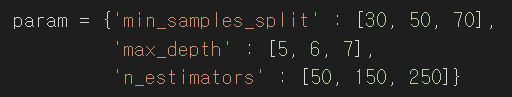|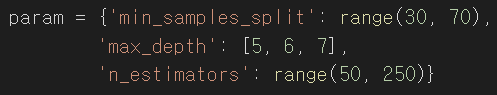|
|best_scores|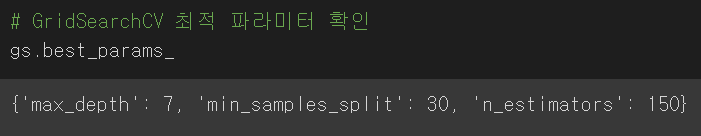|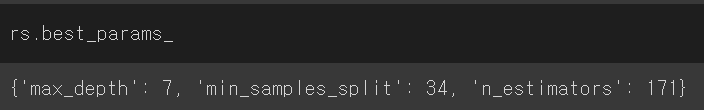|

In [88]:
model.fit(X_rf_train, y_rf_train)

RandomForestRegressor()

⛔ RandomForestRegressor의 params가 어떻게 설정되어 학습한거지? 

⇨ 아래의 저장된 파일명으로는 최적 params search 없이 RandomForestRegressor의 defualt값만으로 진행한 결과를 나타내는 것 같다.

In [89]:
submission['count'] = model.predict(X_rf_test)

In [90]:
submission.to_csv('rf_default.csv', index = False)

In [91]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=10)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state=10)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1, random_state=10)
model_500 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10)

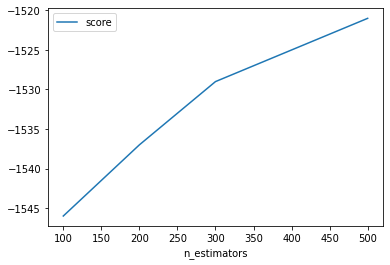

In [92]:
pd.DataFrame({'n_estimators':[100, 200, 300, 500], 'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')

In [93]:
%%time
score = cross_val_score(model_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2347.9548345493354
CPU times: user 988 ms, sys: 91.1 ms, total: 1.08 s
Wall time: 2.19 s


- `%%time ` : Cell 전체에 적용, Cell 코드를 모두 수행한 후 시간을 측정하여 반환
- `%time` : 명령어 뒤에 한줄 코드가 수행되는데 걸리는 시간을 반환

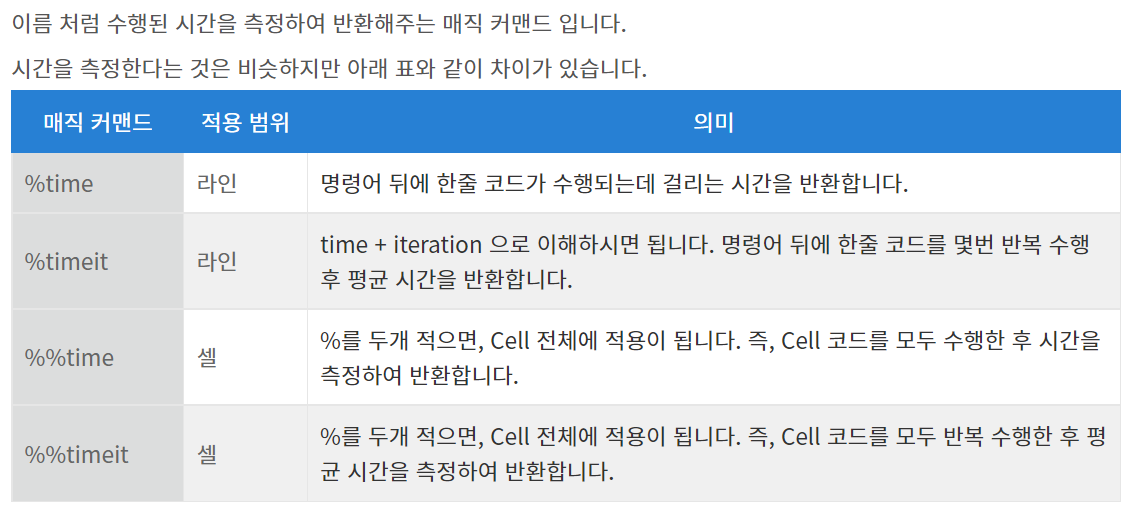
[출처](https://sosomemo.tistory.com/60)

In [94]:
%%time
score = cross_val_score(model_200, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2346.748050875245
CPU times: user 1.67 s, sys: 139 ms, total: 1.81 s
Wall time: 3.47 s


In [95]:
%%time
score = cross_val_score(model_300, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2342.70655563978
CPU times: user 2.42 s, sys: 216 ms, total: 2.64 s
Wall time: 4.81 s


In [96]:
%%time
score = cross_val_score(model_500, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2340.348982311586
CPU times: user 3.74 s, sys: 336 ms, total: 4.07 s
Wall time: 7.91 s


|model|score|CPU time|Wall time|
|---|---|---|---|
|model_100|-2347.9548345493354|1.07 s|2.17 s|
|model_200|-2346.748050875245|1.83 s|3.58 s|
|model_300|-2342.70655563978|2.74 s|5.06 s|
|model_500|-2340.348982311586|4.18 s|8.2 s|


- 예측성능 평가지표로 `neg_mean_squared_errer`(평균 제곱 오차 회귀 손실)을 사용하였고 점수가 낮을 수록 좋은데 `model_500`이 가장 낮음을 볼 수 있음. 
- CPU time : (Excution Time)오직 CPU가 실행된 시간
- Wall time : (Wall-clock time)프로그램이 실행되고 종료 될 때까지 CPU, I/O, Sub Program 등의 모든 시간을 합친 것

In [97]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=100)

In [98]:
%%time
score = cross_val_score(model_sam_30, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1904.976558542718
CPU times: user 3.21 s, sys: 221 ms, total: 3.43 s
Wall time: 6.14 s


In [99]:
%%time
score = cross_val_score(model_sam_50, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1951.2984998200923
CPU times: user 3.32 s, sys: 200 ms, total: 3.52 s
Wall time: 5.98 s


In [100]:
%%time
score = cross_val_score(model_sam_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2131.0650478379994
CPU times: user 3.17 s, sys: 205 ms, total: 3.38 s
Wall time: 5.65 s


|model|score|CPU time|Wall time|
|---|---|---|---|
|model_sam_30|-1904.976558542718|3.57 s|6.39 s|
|model_sam_50|-1951.2984998200923|3.74 s|6.3 s|
|model_sam_100|-2131.0650478379994|3.49 s|5.88 s|

- 앞서 `n_estimator`가 500일때 가장 낮은 score를 보여주어 `n_estimator`을 500으로 고정하고 `min_sample_split`을 변화를 주어 비교하였다.
- `min_sample_split`은 내부 노드를 분할하는데 필요한 최소 샘플 수(defualt = 2)을 나타내며 model을 학습한 결과 샘플 수가 30일때가 score가 가장 낮았다.

In [101]:
final_model = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)

In [102]:
final_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_estimators=500, n_jobs=-1,
                      random_state=10)

In [103]:
submission['count'] = final_model.predict(X_test)

In [104]:
submission.to_csv('estimators_500_samples_30.csv', index = False)

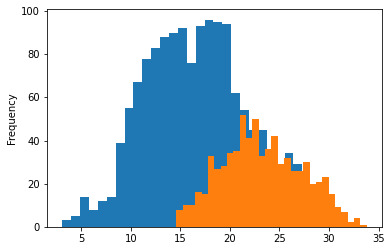

In [105]:
train['hour_bef_temperature'].plot(bins = 30, kind = 'hist')
test['hour_bef_temperature'].plot(bins = 30, kind = 'hist')

⛔ 'hour_bef_temperature' column만 따로 plot을 그려서 확인하는 이유는 무엇일까???

- bins : 히스토그램의 가로축 구간의 개수를 지정
- kind : 생성할 plot 종류

|kind|설명|
|---|---|
|`line`|line plot (default)|
|`bar`|vertical bar plot|
|`barh`|horizontal bar plot 수평 바 그래프|
|`hist`|histogram|
|`box`|boxplot|
|`kde`|Kernel Density Estimation plot|
|`density`|same as ‘kde’|
|`area`|area plot 넓이로서 값을 표현하는 면적 그래프|
|`pie`|pie plot|
|`scatter`|scatter plot (DataFrame only)|
|`hexbin`|hexbin plot 고밀도 산점도 그래프 (DataFrame only)|

In [106]:
rf_maxf_02 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.2)
rf_maxf_04 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.4)
rf_maxf_06 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.6)
rf_maxf_08 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.8)

RandomForestRegressor hyperparameter(update)

- n_estimators : 숲(forest)에 있는 나무(tree)의 수
- max_depth ; tree의 최대 깊이
- min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수(defualt = 2)
- n_jobs : 병렬로 실행할 작업 수( -1 : 모든 프로세서를 사용한다는 의미)
- max_features : best 분할을 찾기 위해 고려되는 feature의 수
   * float : `round(max_features * n_features)`형태
   * int : 지정된 수 만큼 features를 지정
   * auto : `max_features=n_features`
   * sqrt : `max_features=sqrt(n_features)`
   * log2 : `max_features=log2(n_features)`
   * None : `max_features=n_features`

In [107]:
%%time
score = cross_val_score(rf_maxf_02, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1957.674159936385
CPU times: user 3.17 s, sys: 189 ms, total: 3.35 s
Wall time: 5.63 s


In [108]:
%%time
score = cross_val_score(rf_maxf_04, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1957.6741599363854
CPU times: user 3.21 s, sys: 175 ms, total: 3.39 s
Wall time: 5.67 s


In [109]:
%%time
score = cross_val_score(rf_maxf_06, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1957.674159936385
CPU times: user 3.24 s, sys: 191 ms, total: 3.43 s
Wall time: 5.65 s


In [110]:
%%time
score = cross_val_score(rf_maxf_08, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1957.674159936385
CPU times: user 3.23 s, sys: 181 ms, total: 3.41 s
Wall time: 5.71 s


|model|score|CPU time|Wall time|
|---|---|---|---|
|rf_maxf_02|-1957.674159936385|3.35 s|5.63 s|
|rf_maxf_04|-1957.6741599363854|3.39 s|5.67 s|
|rf_maxf_06|-1957.674159936385|3.43 s|5.65 s|
|rf_maxf_08|-1957.674159936385|3.41 s|5.71 s|

⛔ 베이스라인에서는 100단위만큼의 차이가 있지만 현재 colab에서는 오히라 차이점을 찾기가 어려울정도로 영향이 없었다 왜 다른 결과나 나타날까?


**max_features** 정리

|하이퍼파아미터|역할|
|----|----|
|n_estimator|생성할 트리(tree)의 수|
|max_depth|트리의 깊이| 
|max_features|특성(features)을 나누는 수|

- n_estimator 는 클 수록 좋다! 트리를 많이 만들어 볼수록 좋다. (경우의 수가 많아진다.)
- max_features 는 각 트리의 무작위를 얼마나 할 것인지 결정한다.
   * max_features 값을 크게 하면 
      + random forest의 tree들은 같은 특성을 고려하므로 tree들이 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰집니다.
   * max_features를 낮추면 
      + random forest tree들은 많이 달라지고 각 tree는 데이터에 맞추기 위해 tree의 깊이가 깊어집니다.
   * 분류를 할 때는 max_features = sqrt(n_features)
   * 회귀 할 때는 max_features = n_feature
- 작은 max_features와 큰 n_estimator 는 과대 적합을 줄인다는 장점이 있다. 

- 랜덤 포레스트 모델을 쓸 때는 n_estimator 인자와 max_features인자를 조절하며 결정계수가 가장 높아지는 인자를 사용하는 것이 좋다. 

출처 : [link1](https://creatorjo.tistory.com/142) [link2](https://woolulu.tistory.com/28)

5. 모델 학습 및 검증

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']

In [113]:
X_train.shape, y_train.shape

((1459, 2), (1459,))

In [114]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)

In [115]:
X_trn.shape, X_val.shape, y_trn.shape, y_val.shape

((1094, 2), (365, 2), (1094,), (365,))

In [116]:
from sklearn.model_selection import KFold

In [117]:
kfolds = KFold(n_splits=10, shuffle = True, random_state=10)

In [118]:
kfolds = KFold(n_splits=5, shuffle = True, random_state=5)

In [119]:
import numpy as np

In [120]:
example = np.array([[0,0],
[1,1],
[2,2],
[3,3],
[4,4],
[10,10],
[11,11],
[12,12],
[13,13],
[14,14]])

In [121]:
for idx_trn, idx_val in kfolds.split(example):
    print('TRAIN')
    print(example[idx_trn])
    print('VALIDATION')
    print(example[idx_val])

TRAIN
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [11 11]
 [12 12]
 [13 13]]
VALIDATION
[[10 10]
 [14 14]]
TRAIN
[[ 0  0]
 [ 1  1]
 [ 3  3]
 [10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]]
VALIDATION
[[2 2]
 [4 4]]
TRAIN
[[ 0  0]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [10 10]
 [11 11]
 [13 13]
 [14 14]]
VALIDATION
[[ 1  1]
 [12 12]]
TRAIN
[[ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [10 10]
 [11 11]
 [12 12]
 [14 14]]
VALIDATION
[[ 0  0]
 [13 13]]
TRAIN
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [ 4  4]
 [10 10]
 [12 12]
 [13 13]
 [14 14]]
VALIDATION
[[ 3  3]
 [11 11]]


In [122]:
scores = 0
for idx_trn, idx_val in kfolds.split(train_fts): 

SyntaxError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
train

In [ ]:
cross_val_score()

6. 결과 및 결언

In [ ]:
!pip install scholar

In [ ]:
!pip install article

In [ ]:
!pip install newspaper3k

In [ ]:
import article
import scholar
from newspaper import Article

In [ ]:
url = 'https://scholar.google.com/scholar?hl=ko&as_sdt=0%2C5&q=intelligent+tutoring+system&btnG='
article = Article(url)

In [ ]:
article.download()

In [ ]:
article.authors

In [ ]:
article.publish_date

In [ ]:
article.text

In [ ]:
!scholar.py -c 1 --author "albert einstein" --phrase "quantum theory"